In [1]:
from etl.users import *
from etl.transactions import *
from lib.constants import *
from lib.sql import *
from analysis.viz import *
from analysis.user_paths import *

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
users = get_users()


  sql_to_df (/home/jovyan/lib/sql.py:19):
    1.079 seconds


  _join_mixpanel_stats (/home/jovyan/etl/users.py:145):
    2.793 seconds


  sql_to_df (/home/jovyan/lib/sql.py:19):
    0.197 seconds


  _join_first_order_facts (/home/jovyan/etl/users.py:169):
    1.327 seconds


  _join_user_list (/home/jovyan/etl/users.py:65):
    0.408 seconds


  _join_user_list (/home/jovyan/etl/users.py:65):
    0.296 seconds


  _join_user_list (/home/jovyan/etl/users.py:65):
    0.802 seconds


  _cast_fields (/home/jovyan/etl/users.py:87):
    11.290 seconds


  get_users (/home/jovyan/etl/users.py:14):
    20.046 seconds



In [5]:
users[
    users["lifetime_orders"] > 1
].iloc[1000].transpose()

email                           nds642@gmail.com
first_order_date             2019-01-21 00:00:00
lifetime_gpr                                 386
lifetime_orders                                2
lifetime_units                                18
min_visit_time               2018-09-16 17:29:38
max_visit_time               2019-02-17 11:01:48
visit_days                                    16
days_retained                                154
days_retained_per_visit                    9.625
avg_days_between_orders                        2
min_days_between_orders                        2
max_days_between_orders                        2
avg_days_between_visits                   10.266
min_days_between_visits                        1
max_days_between_visits                       35
quarters_retained                        1.71111
orders_per_quarter                       1.16883
years_retained                                 1
orders_per_year                                2
first_order_division

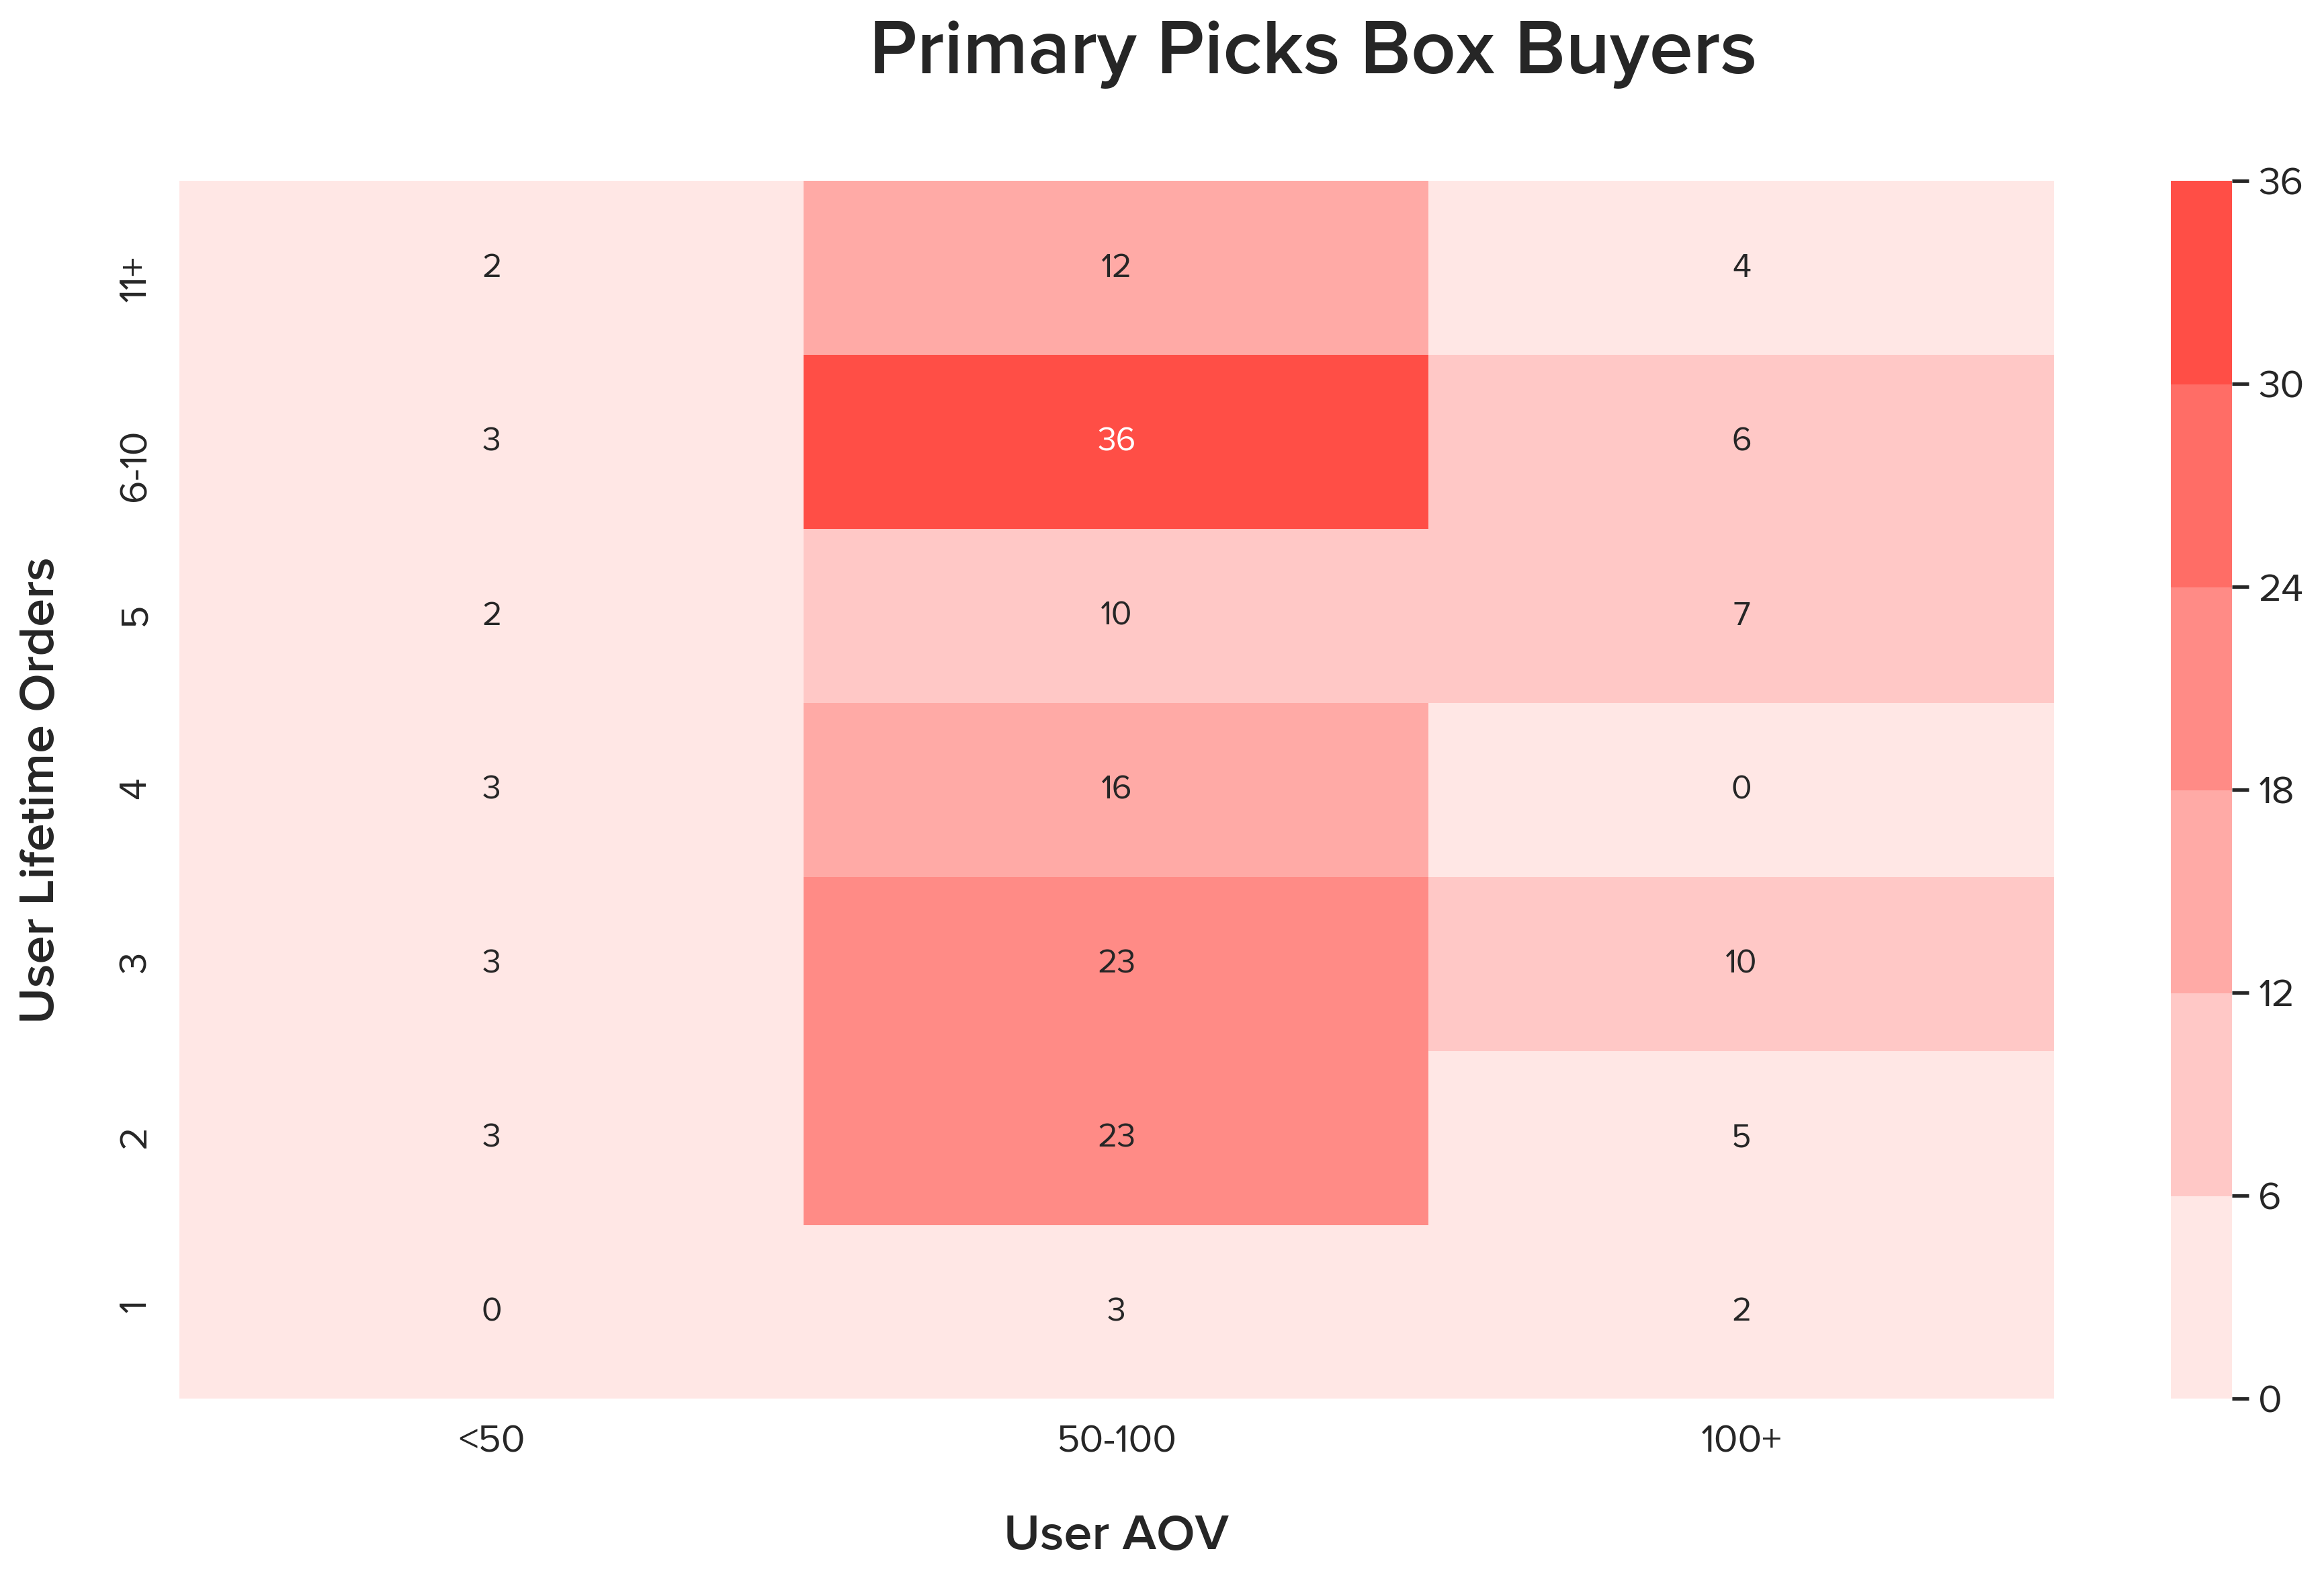

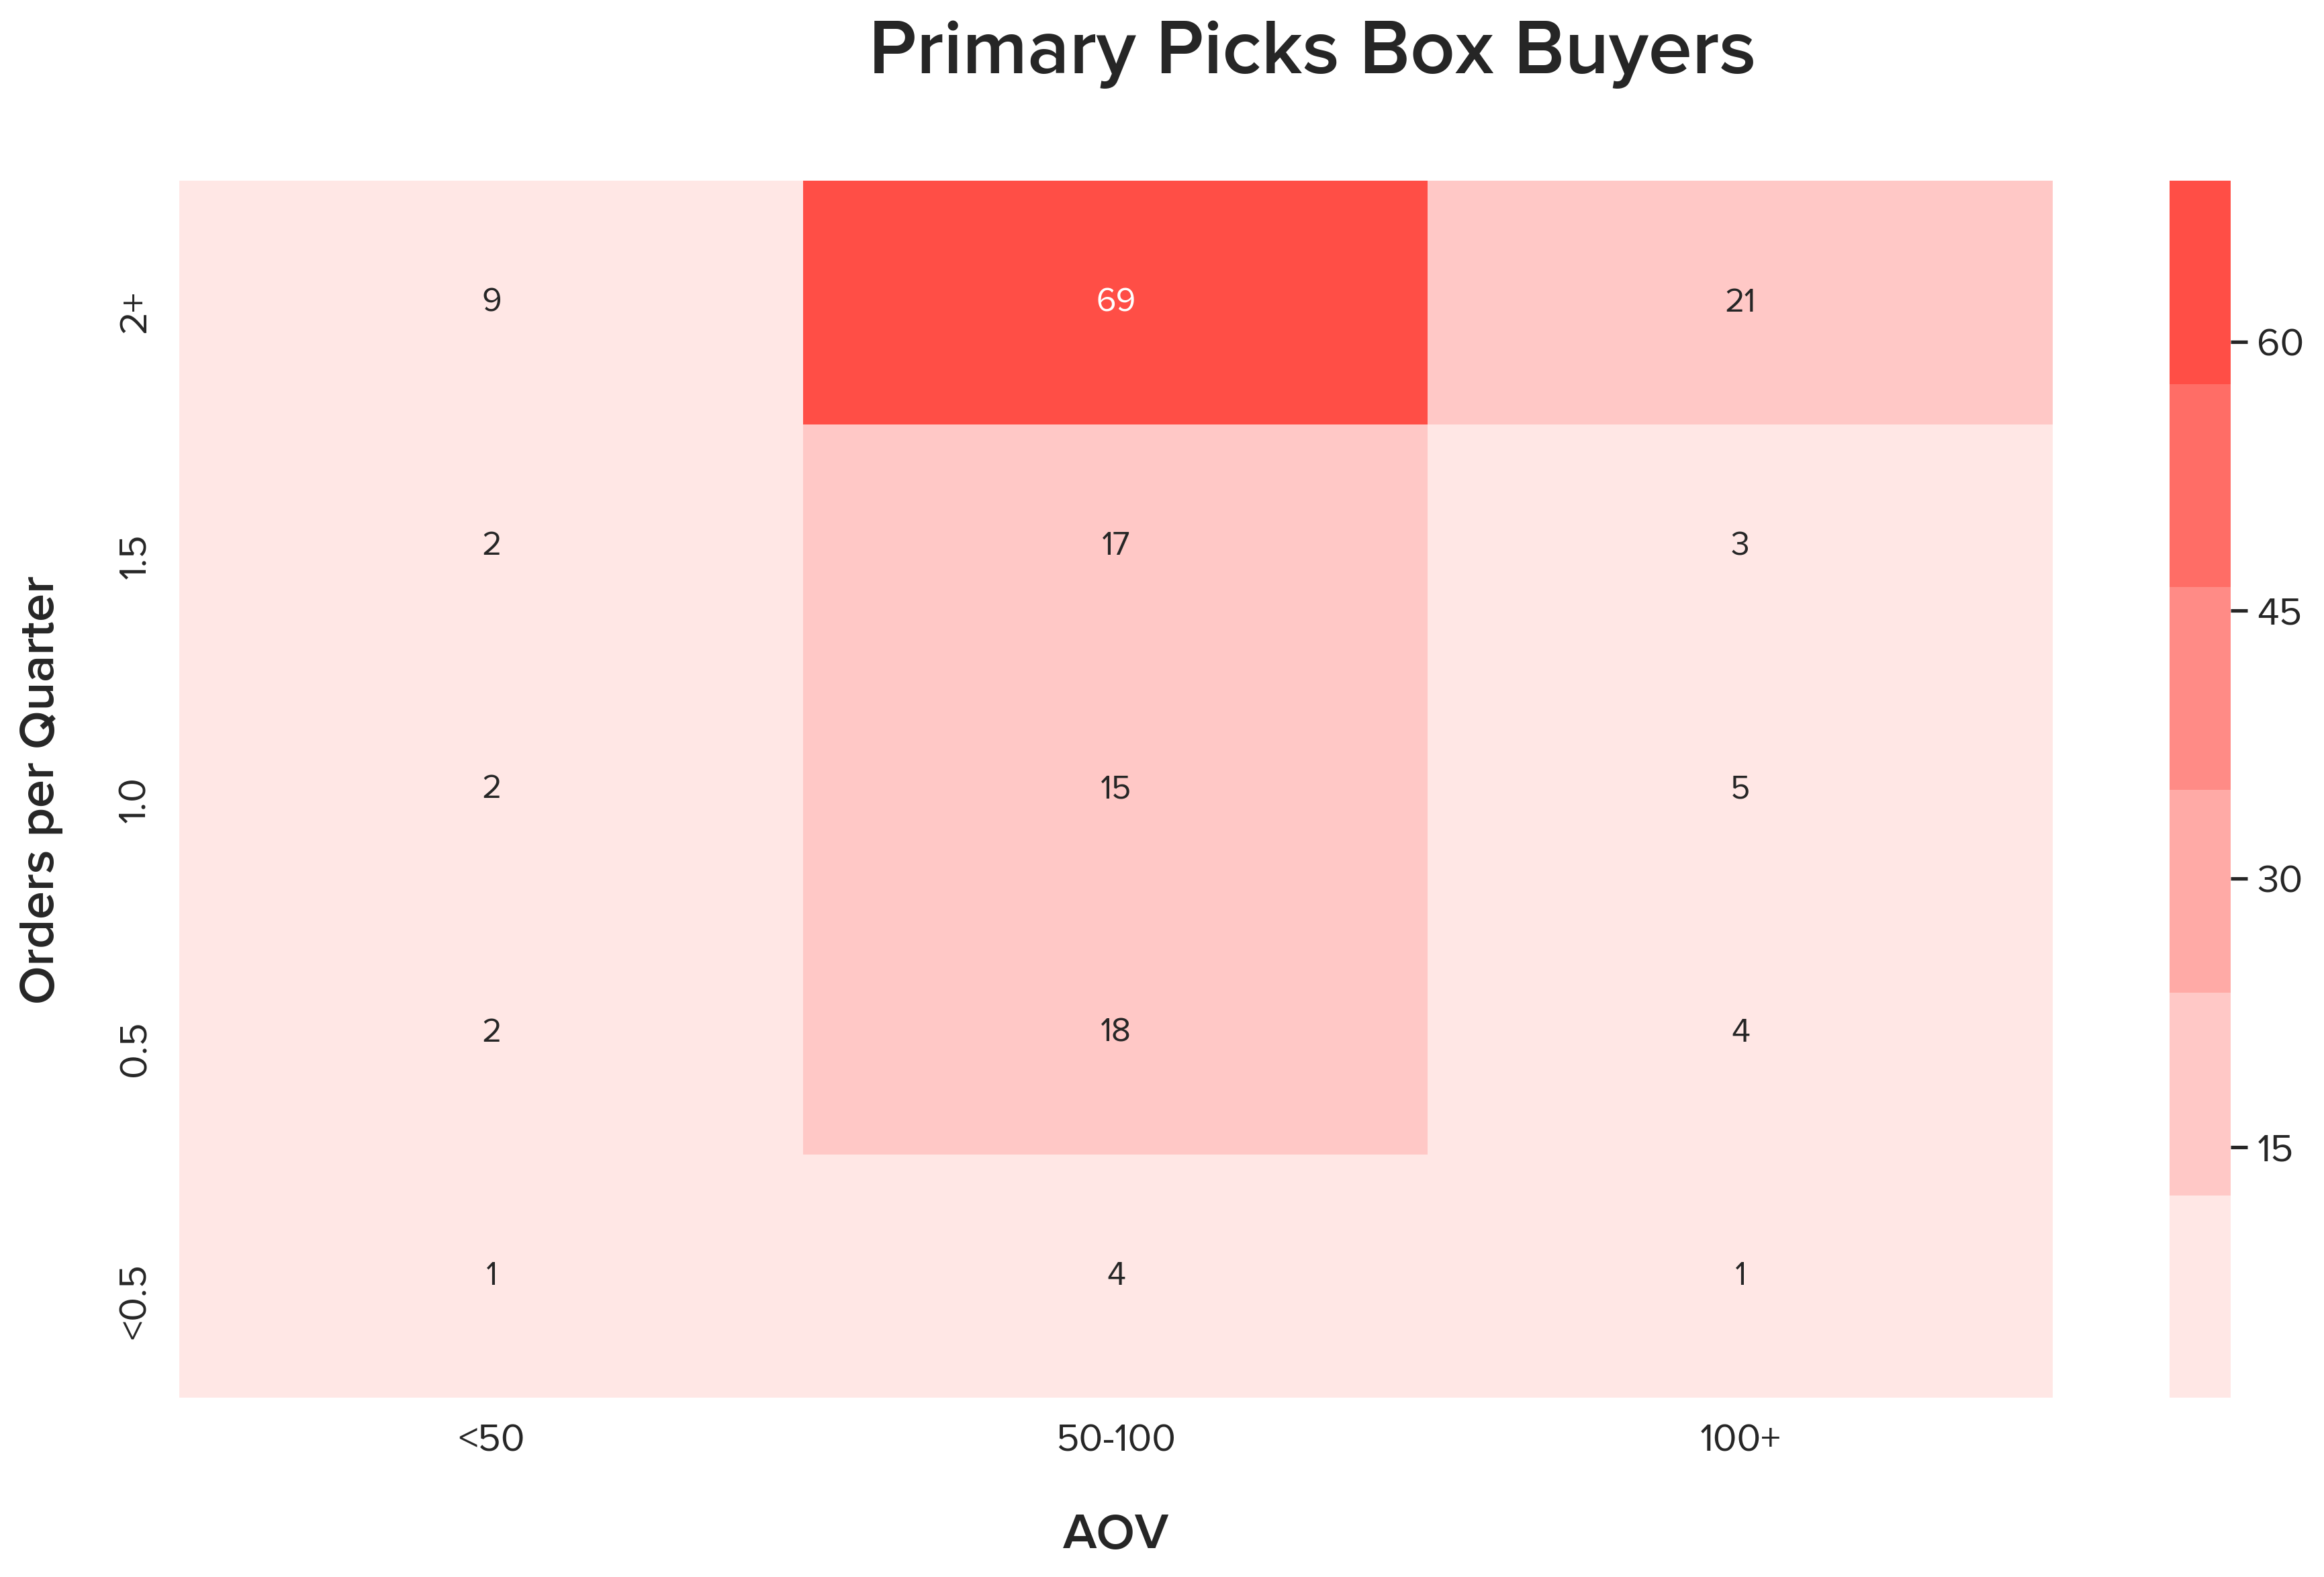

In [10]:
pilot_user_heatmap(users)

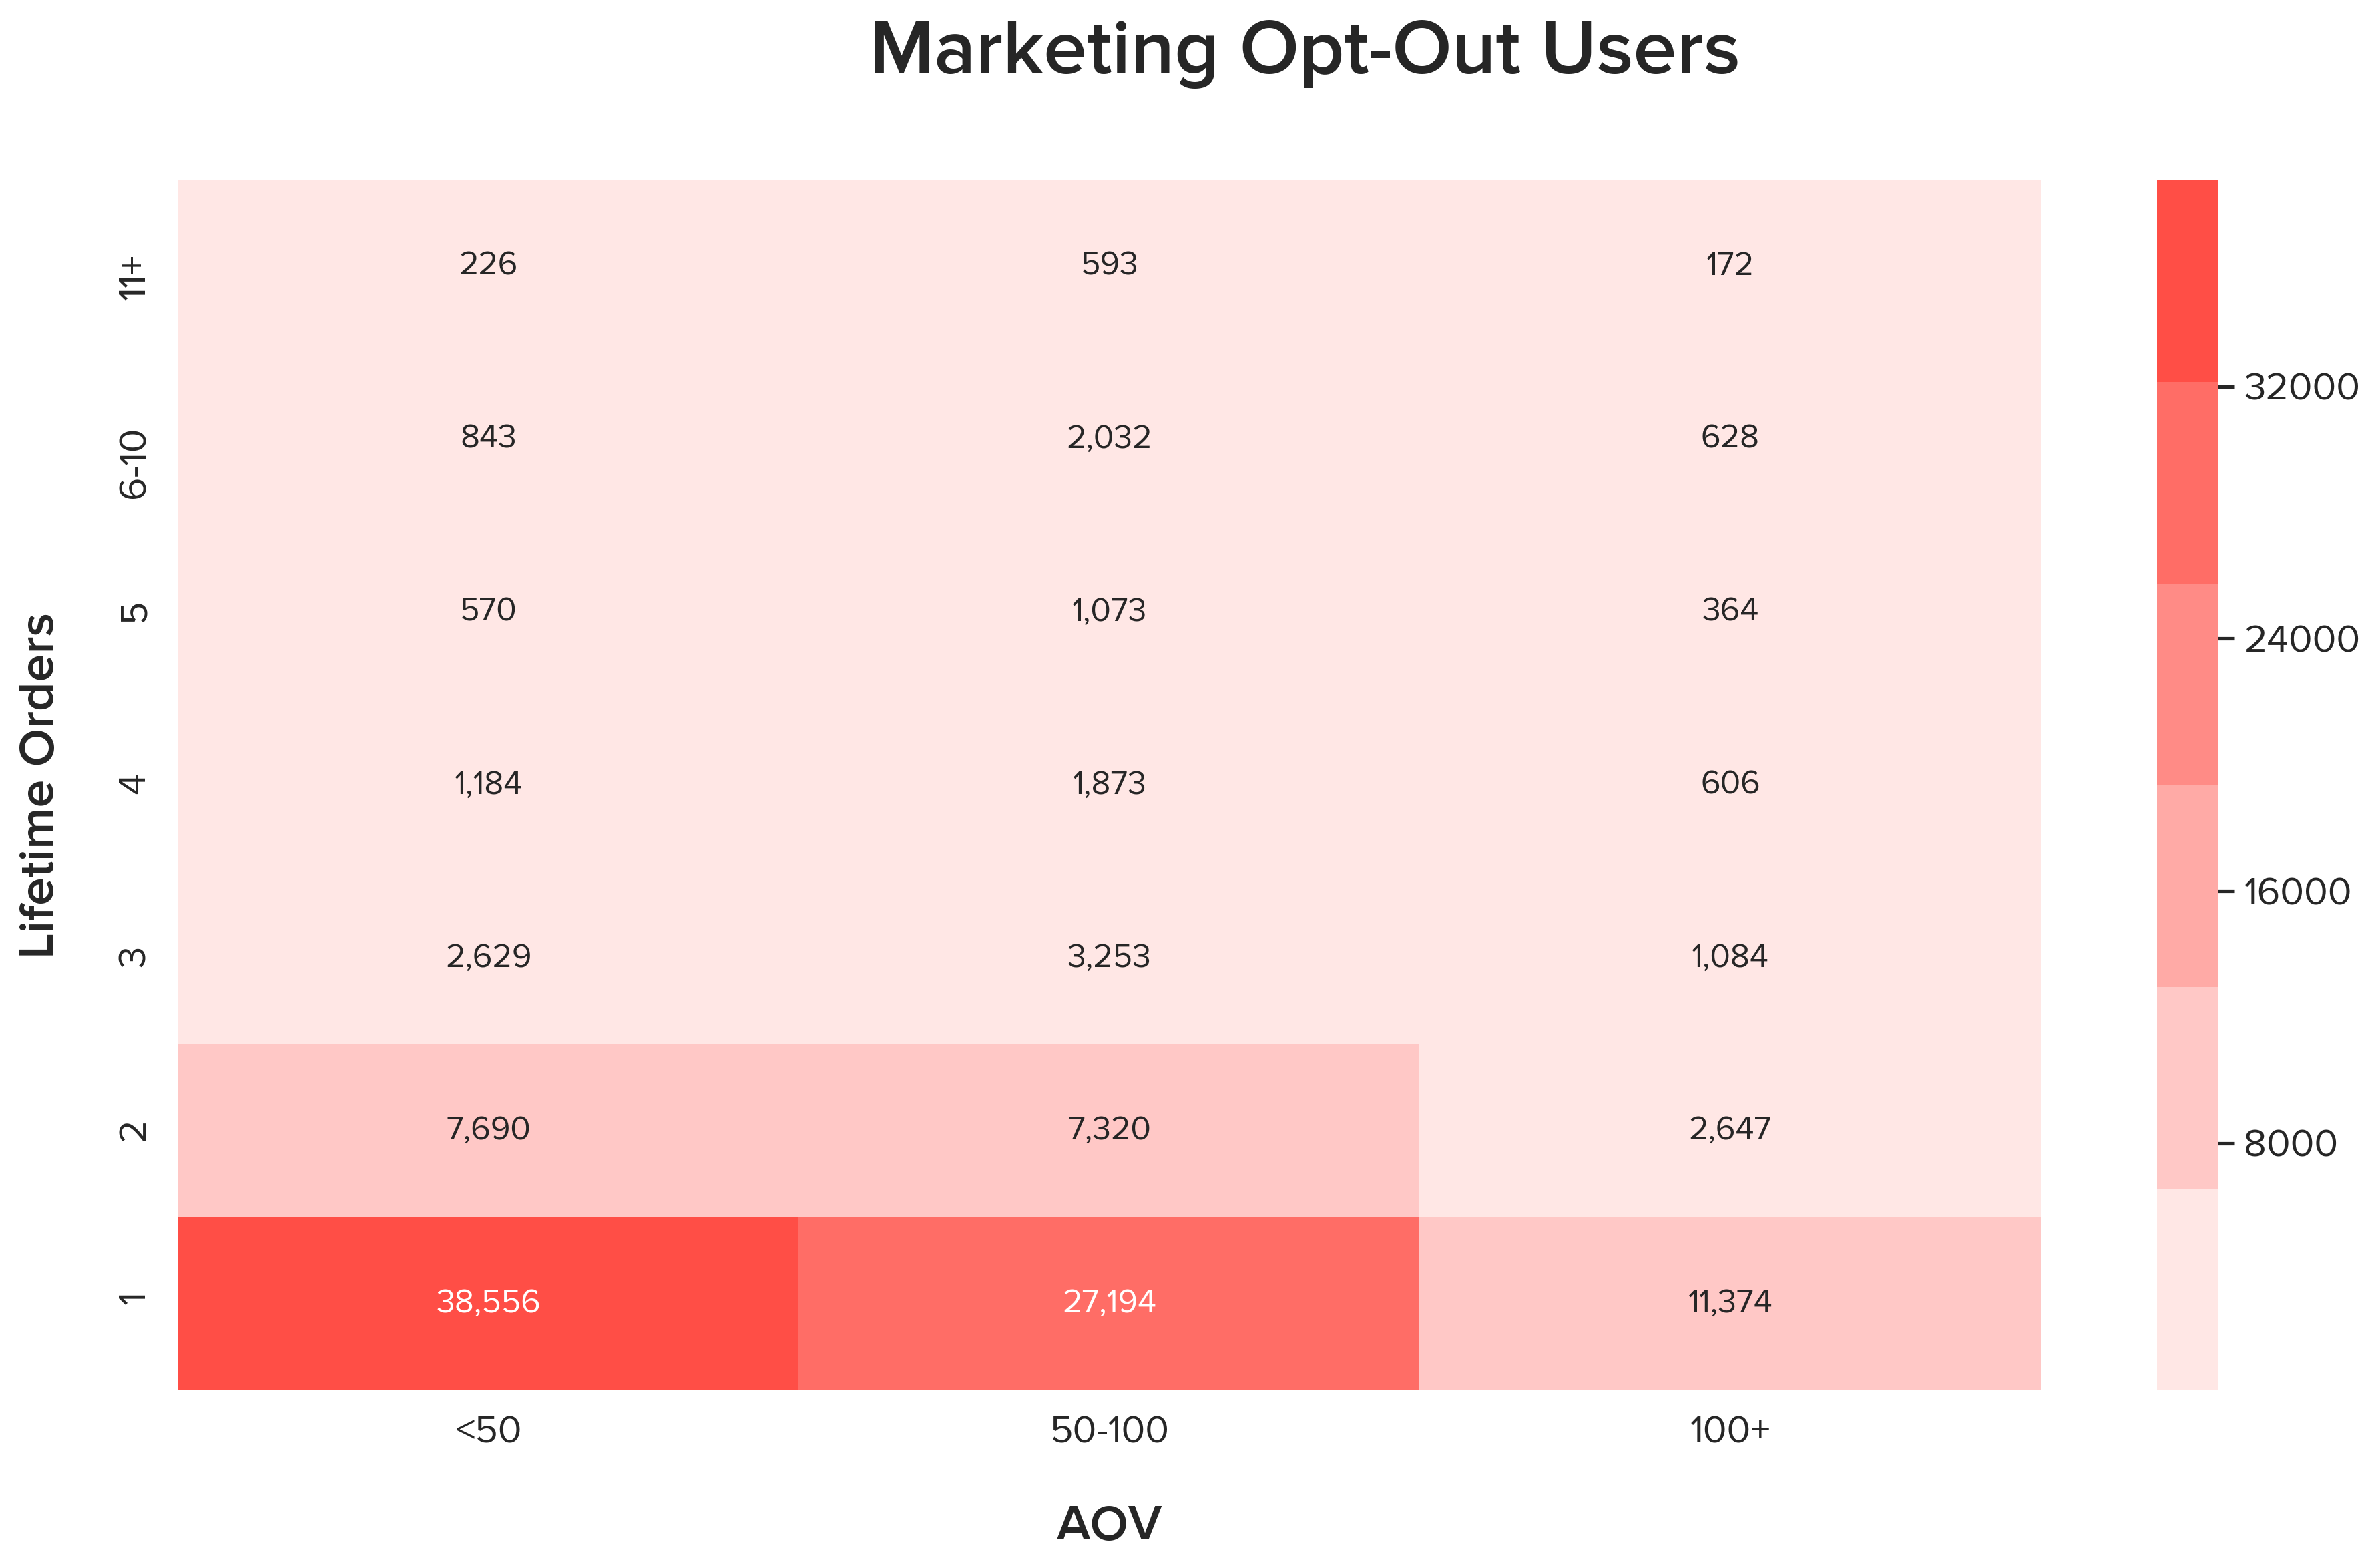

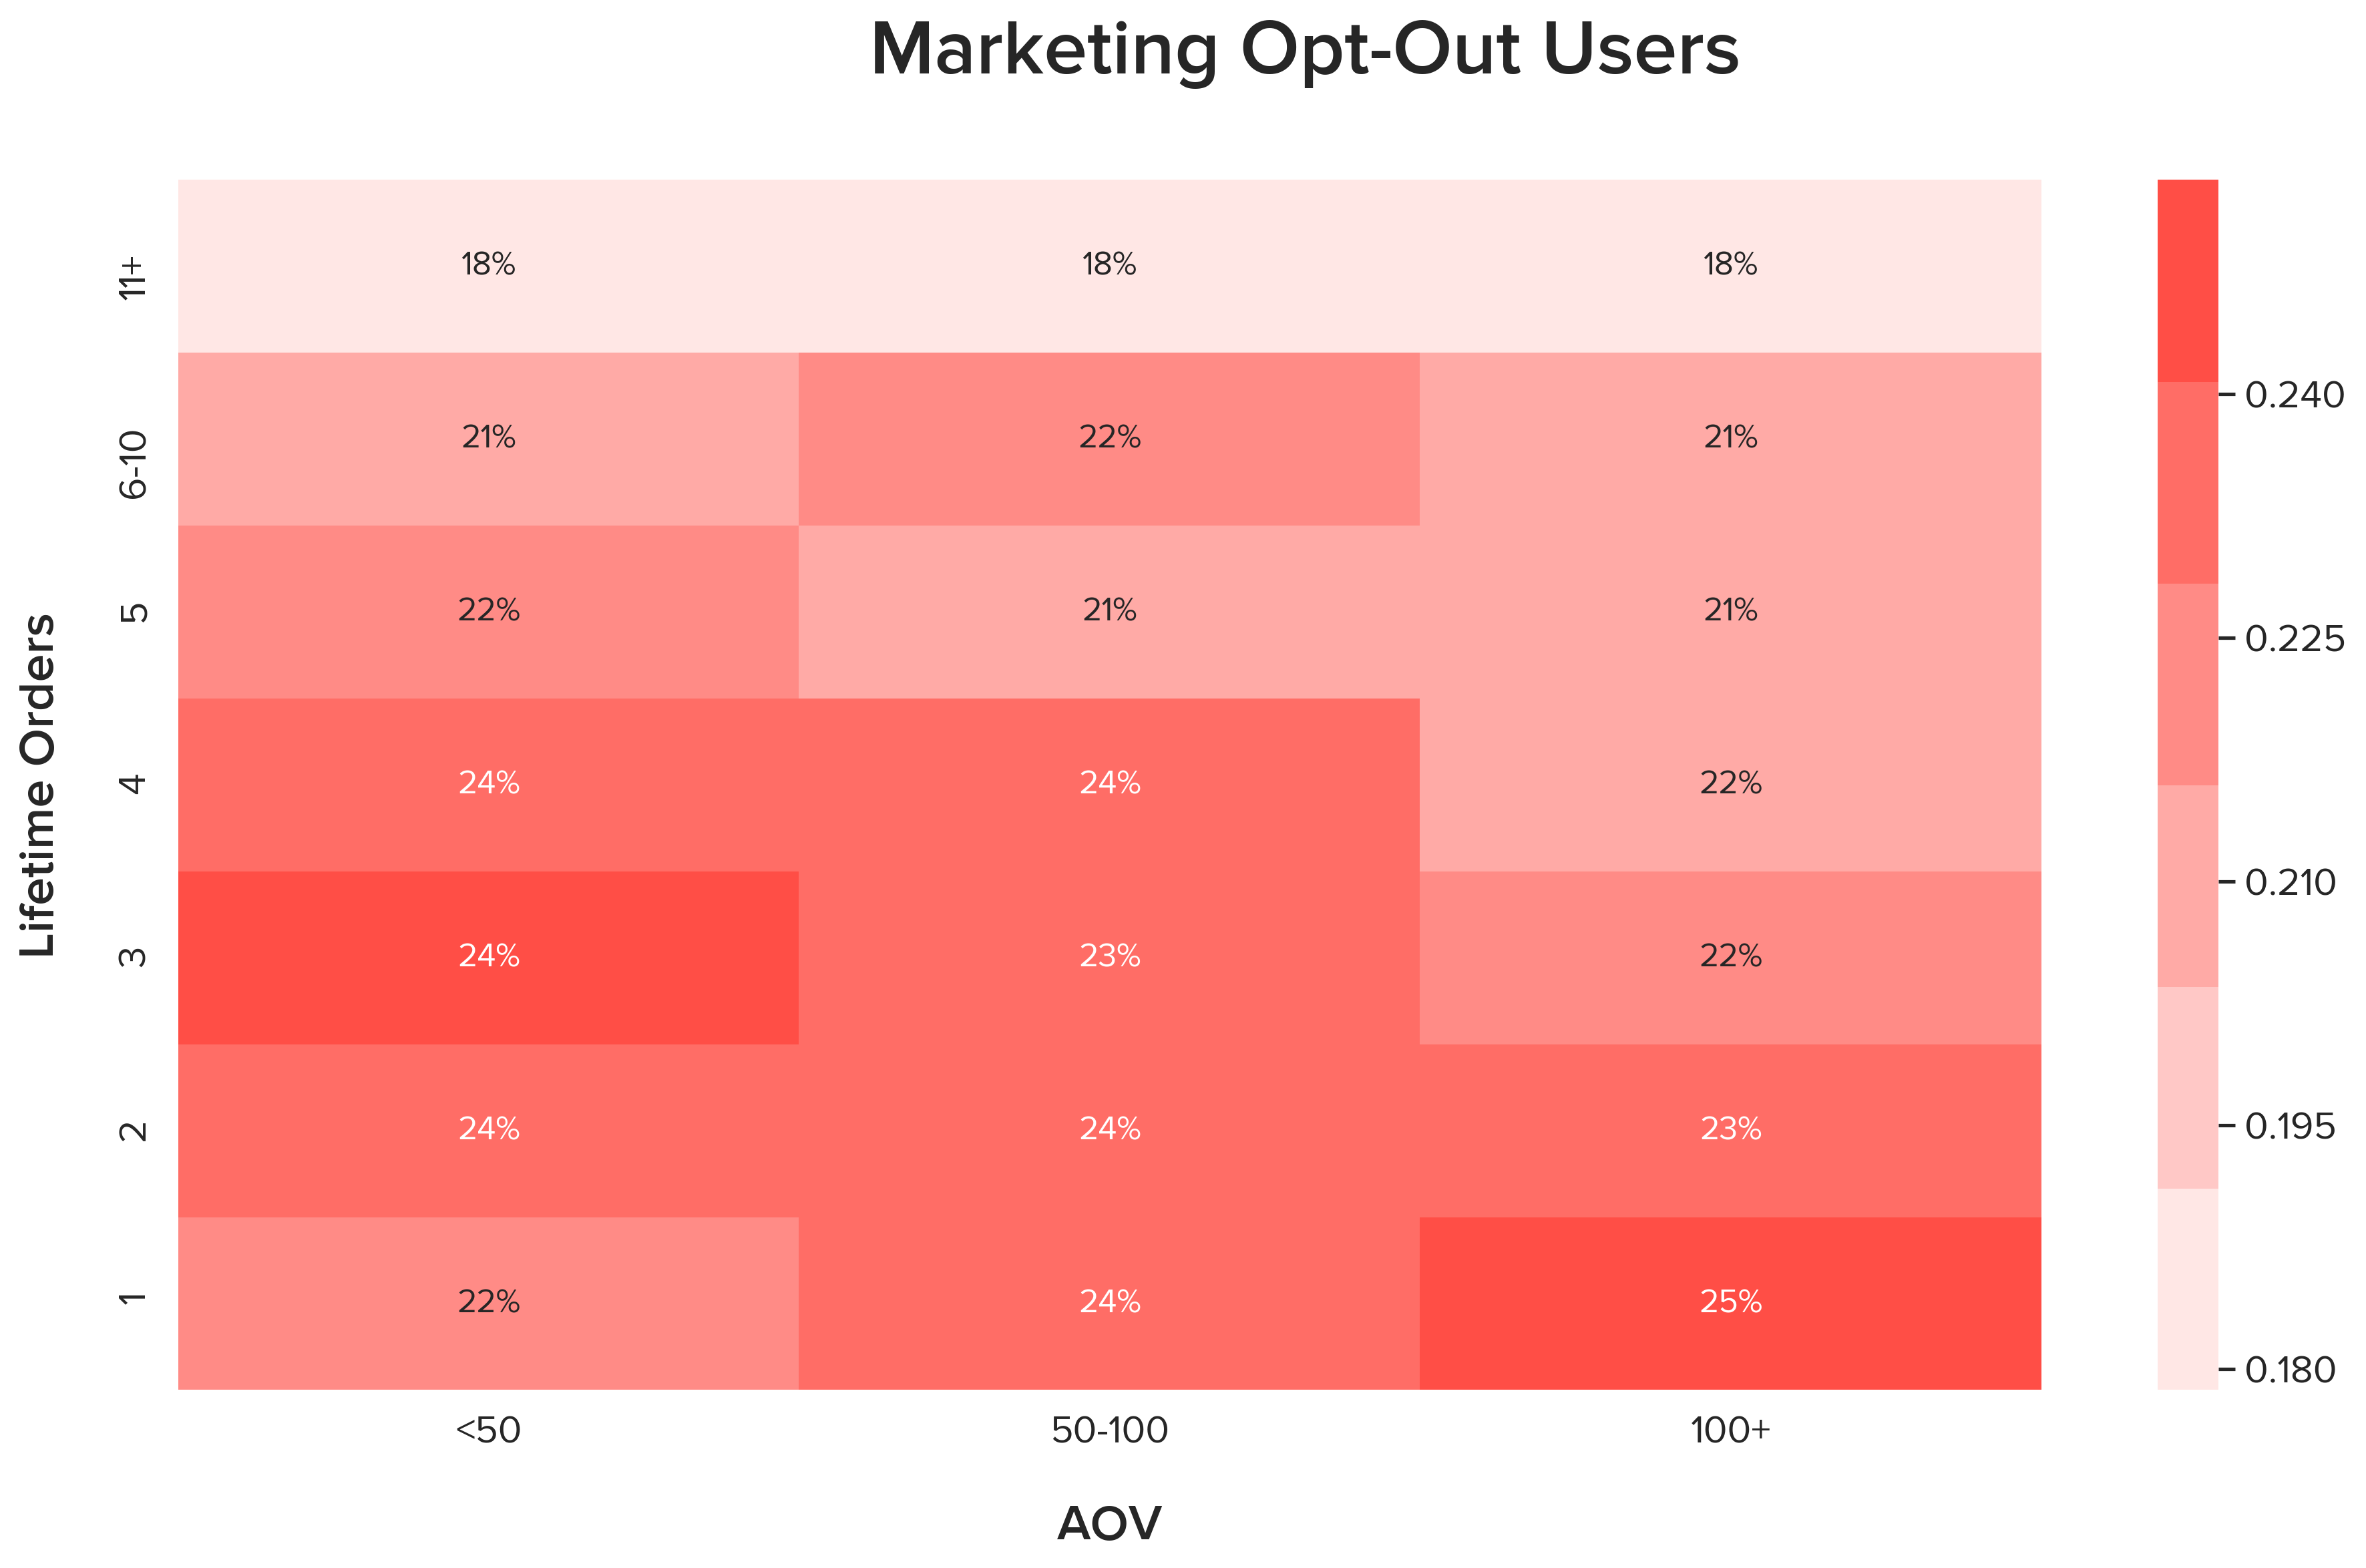

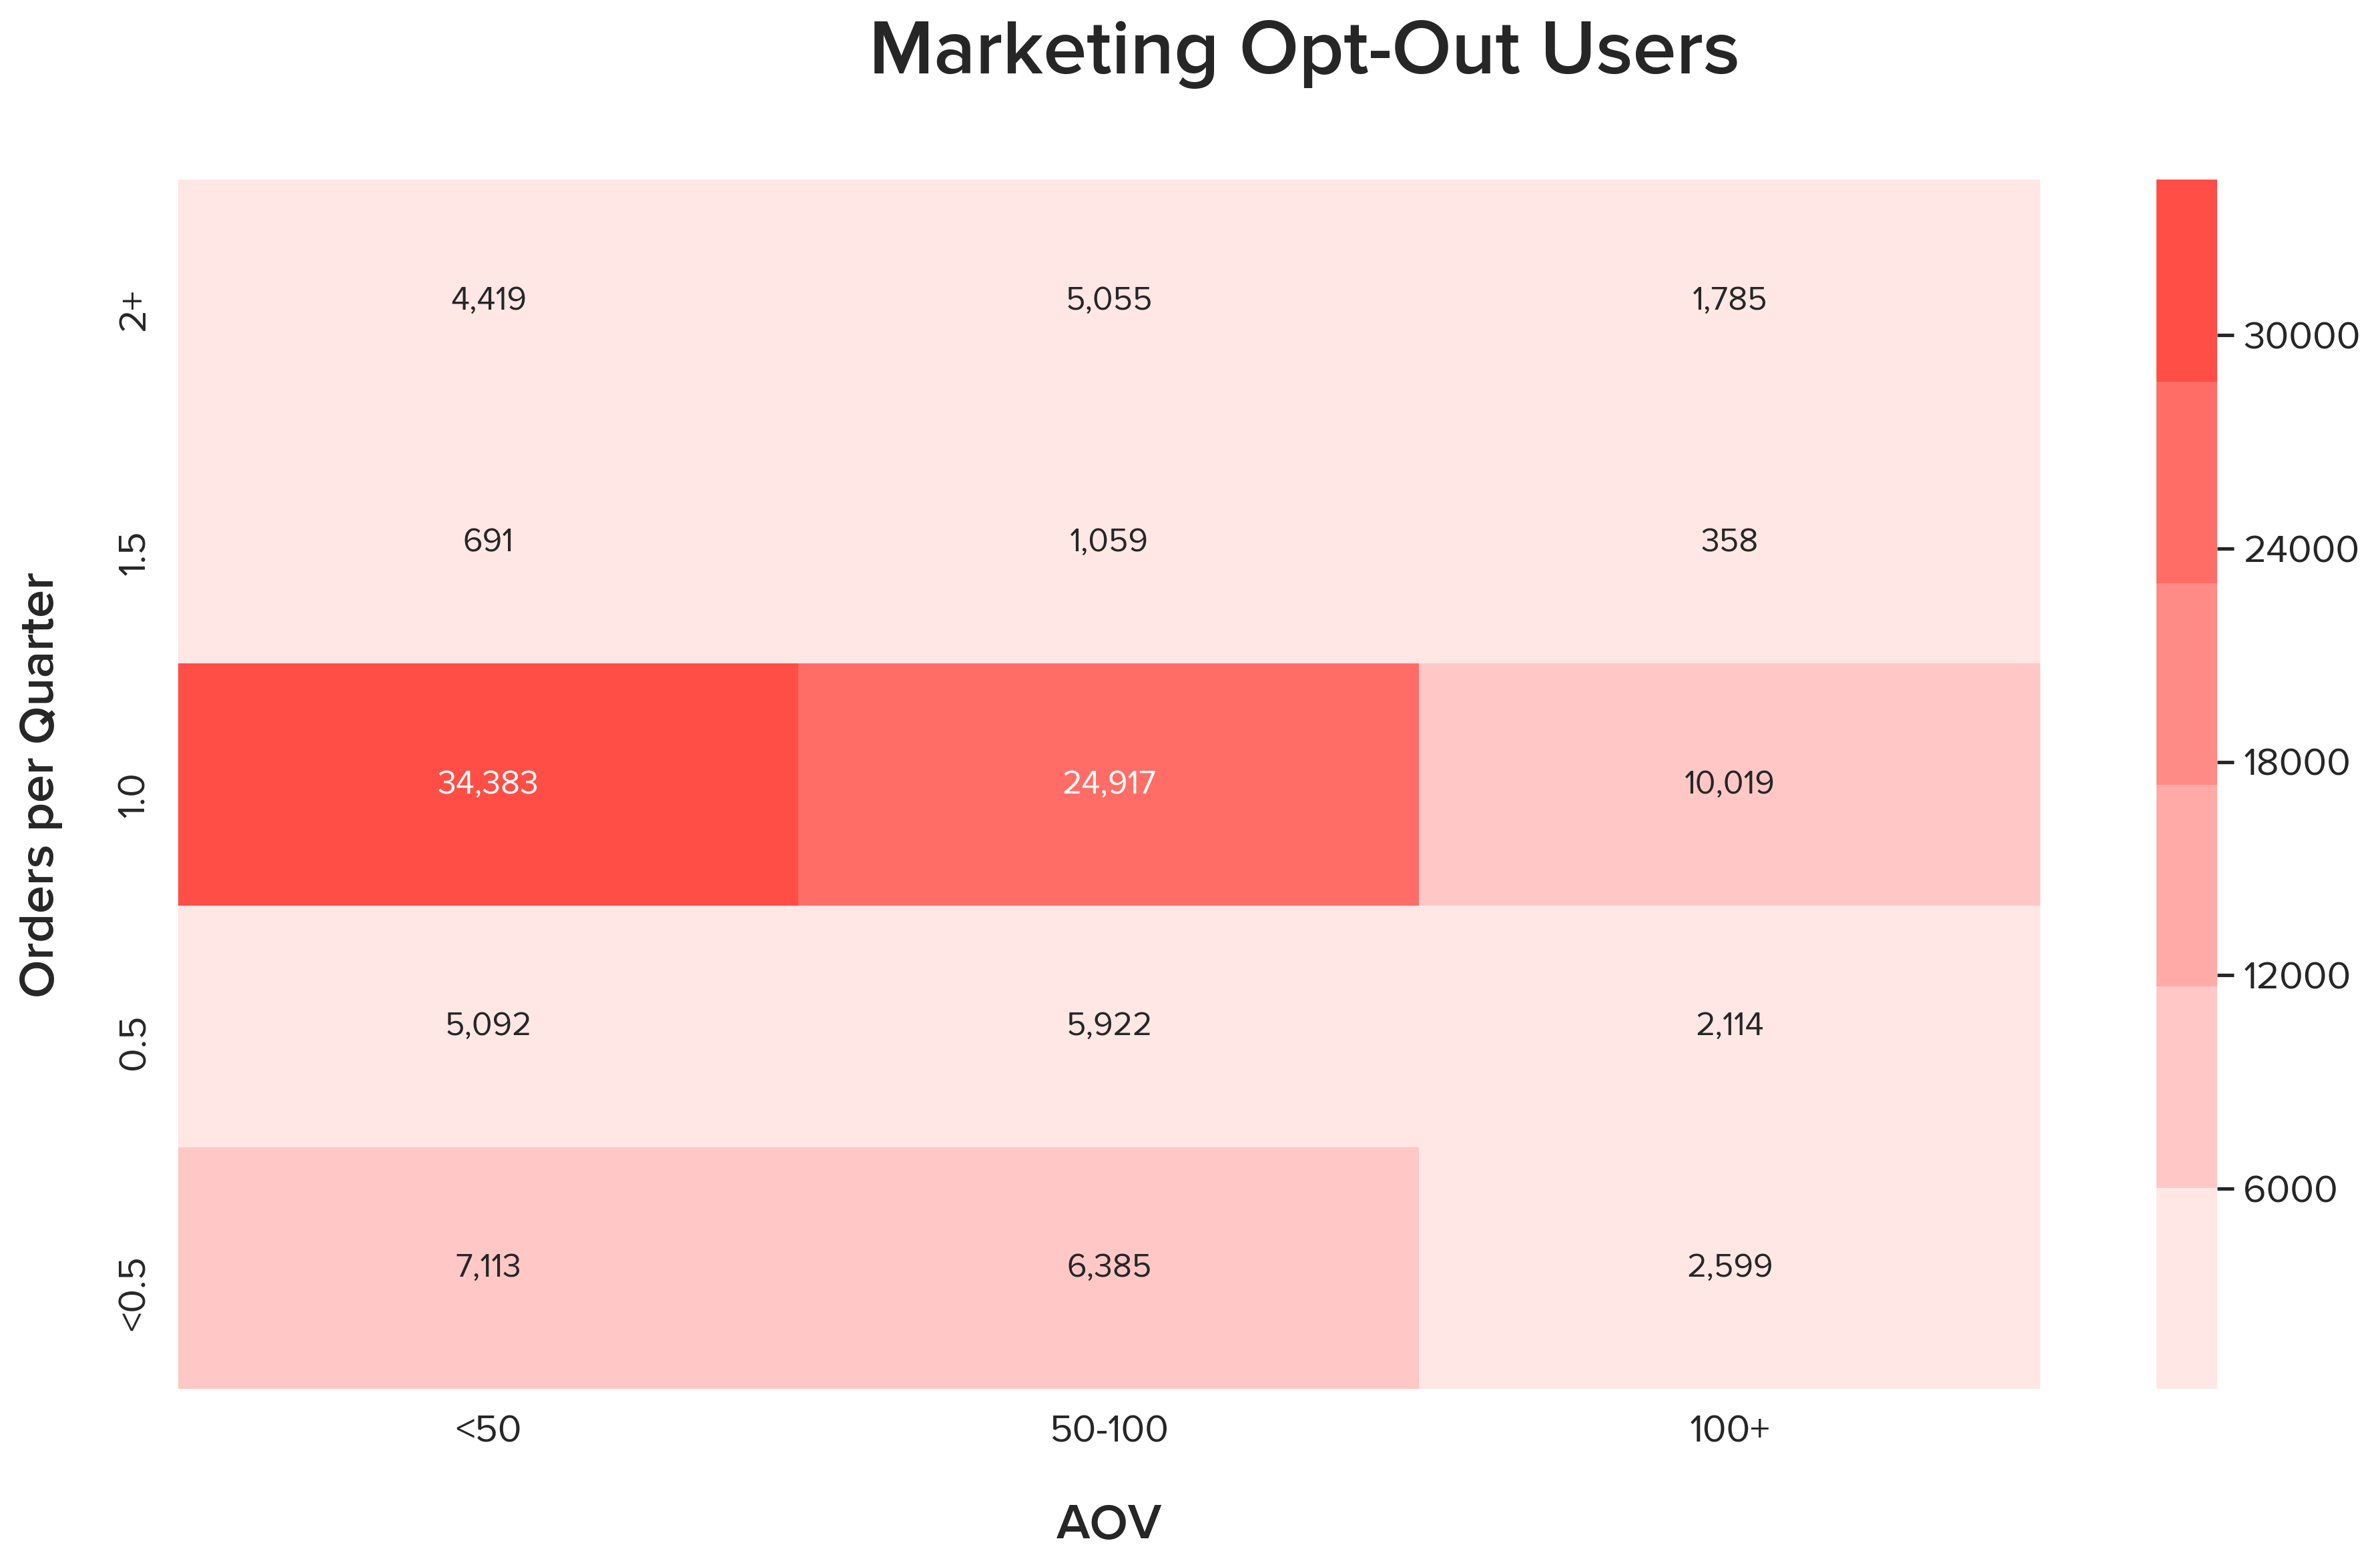

In [6]:
marketing_opt_out(users)

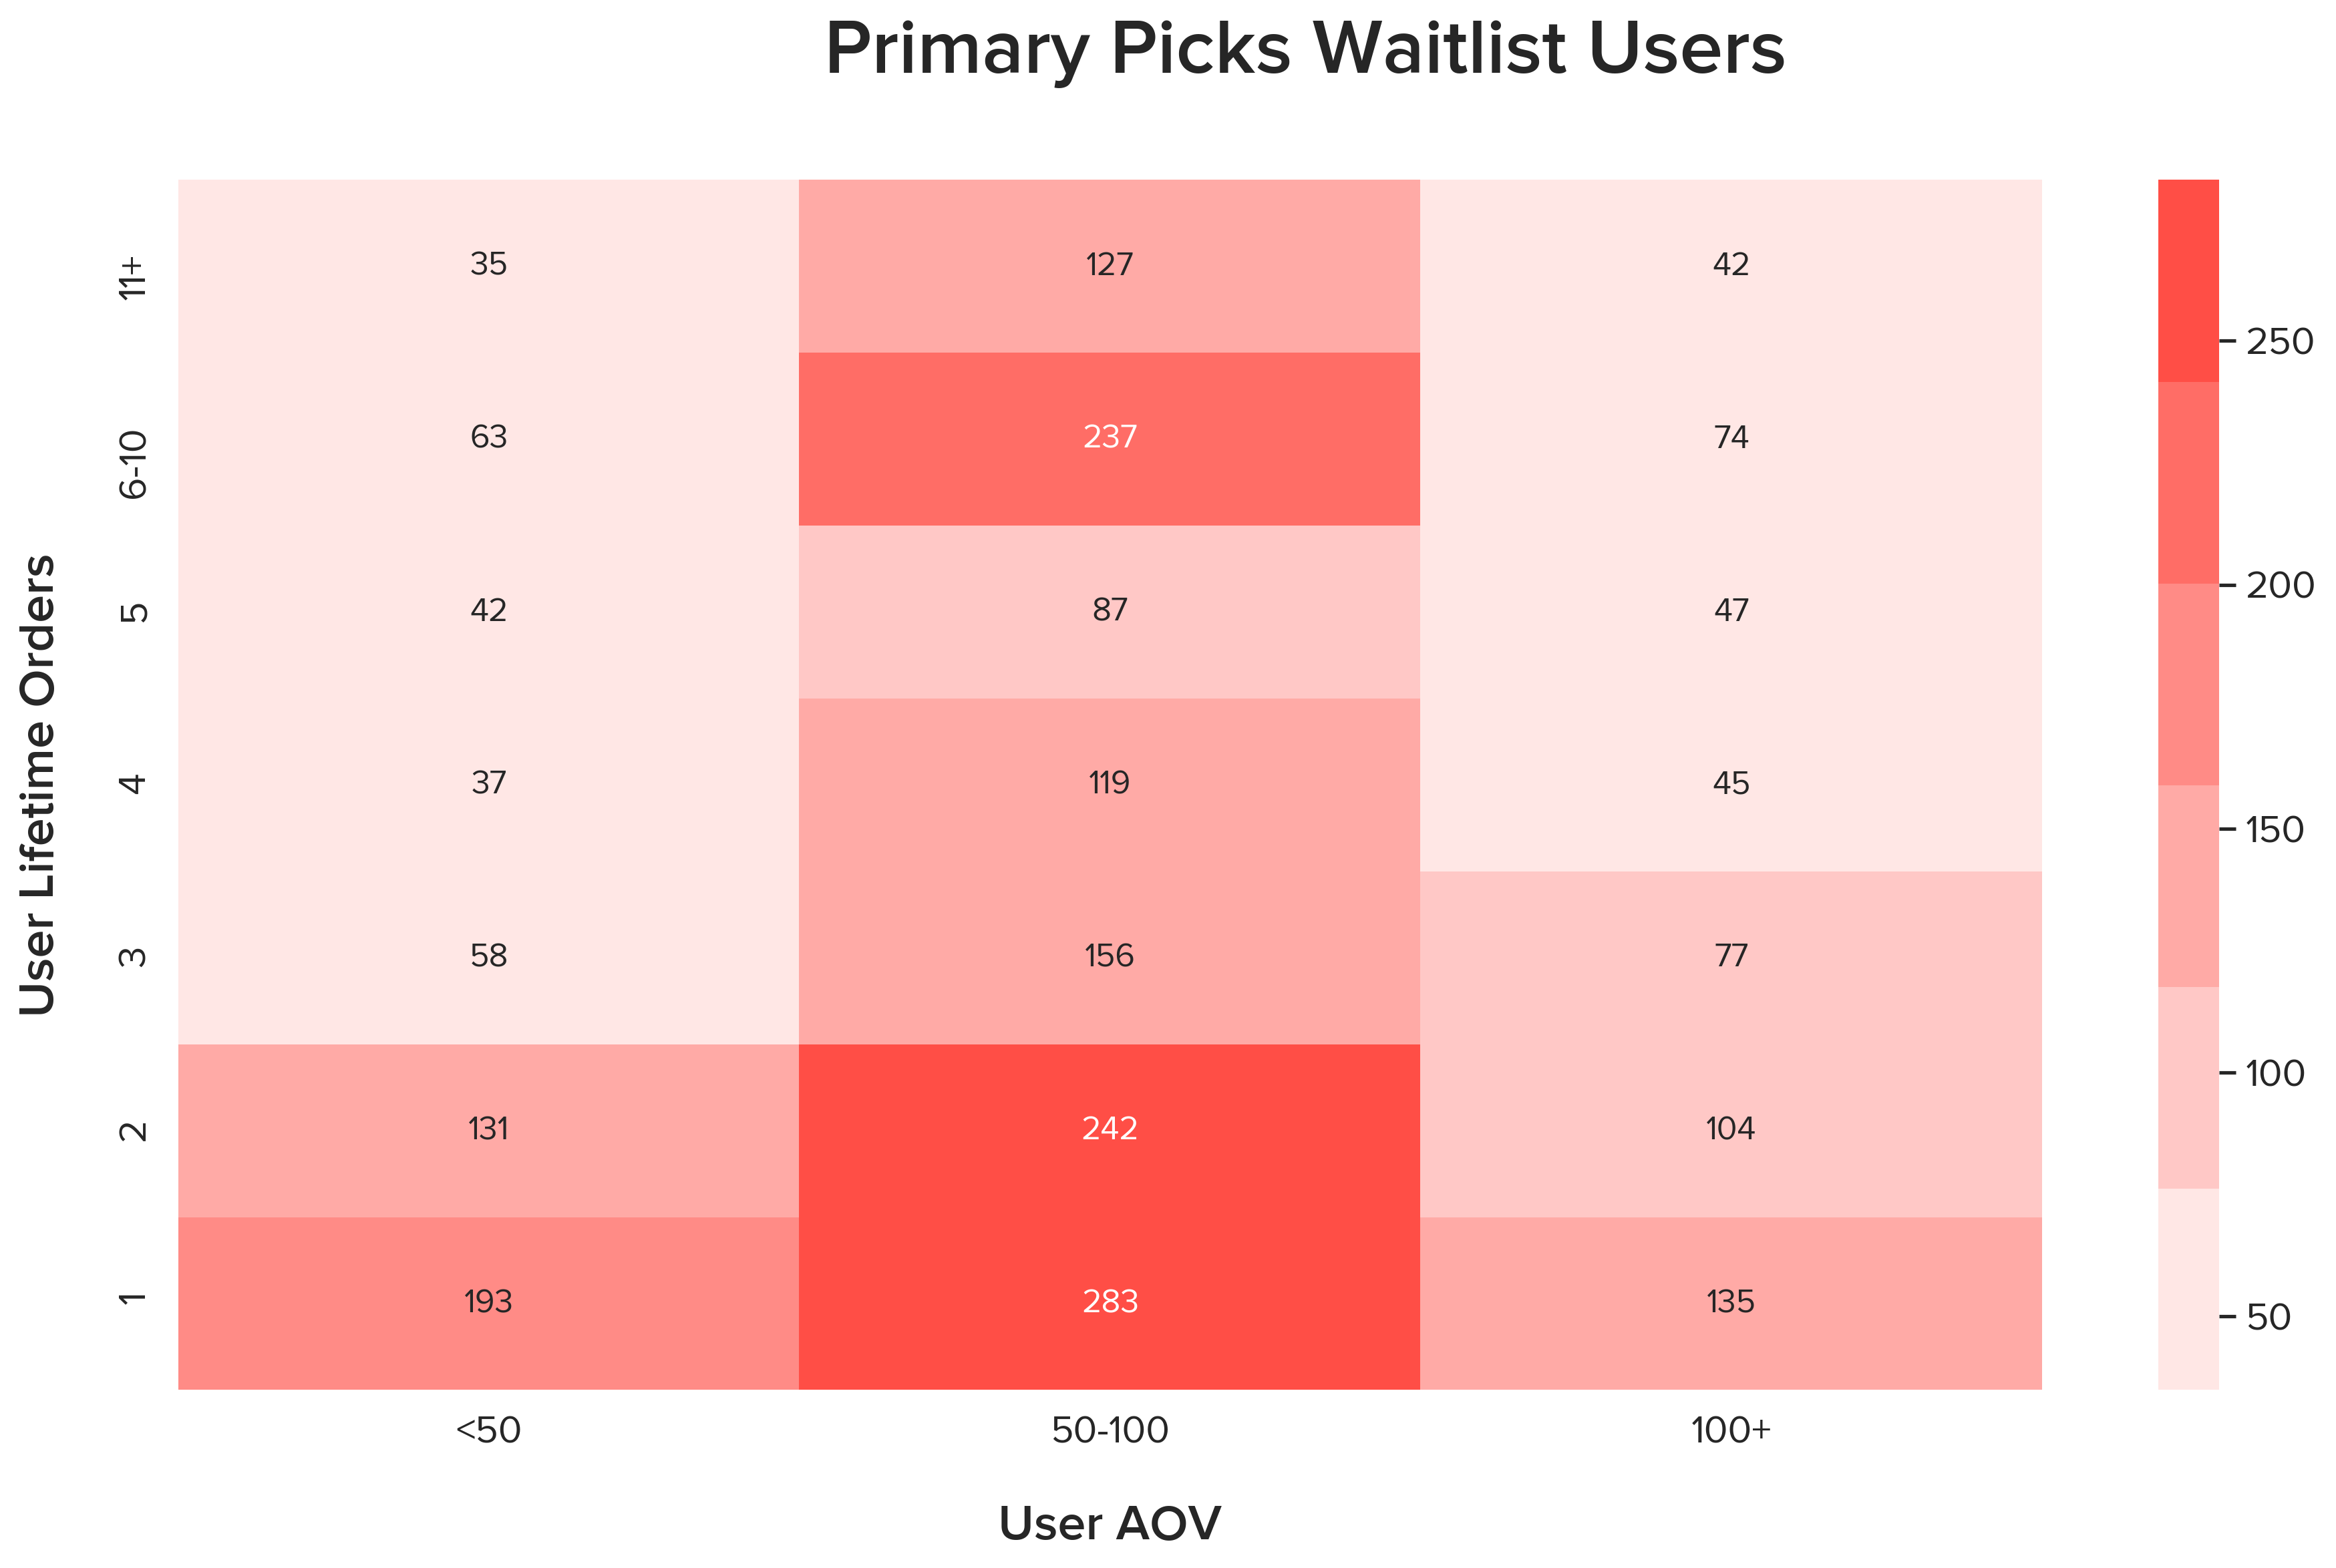

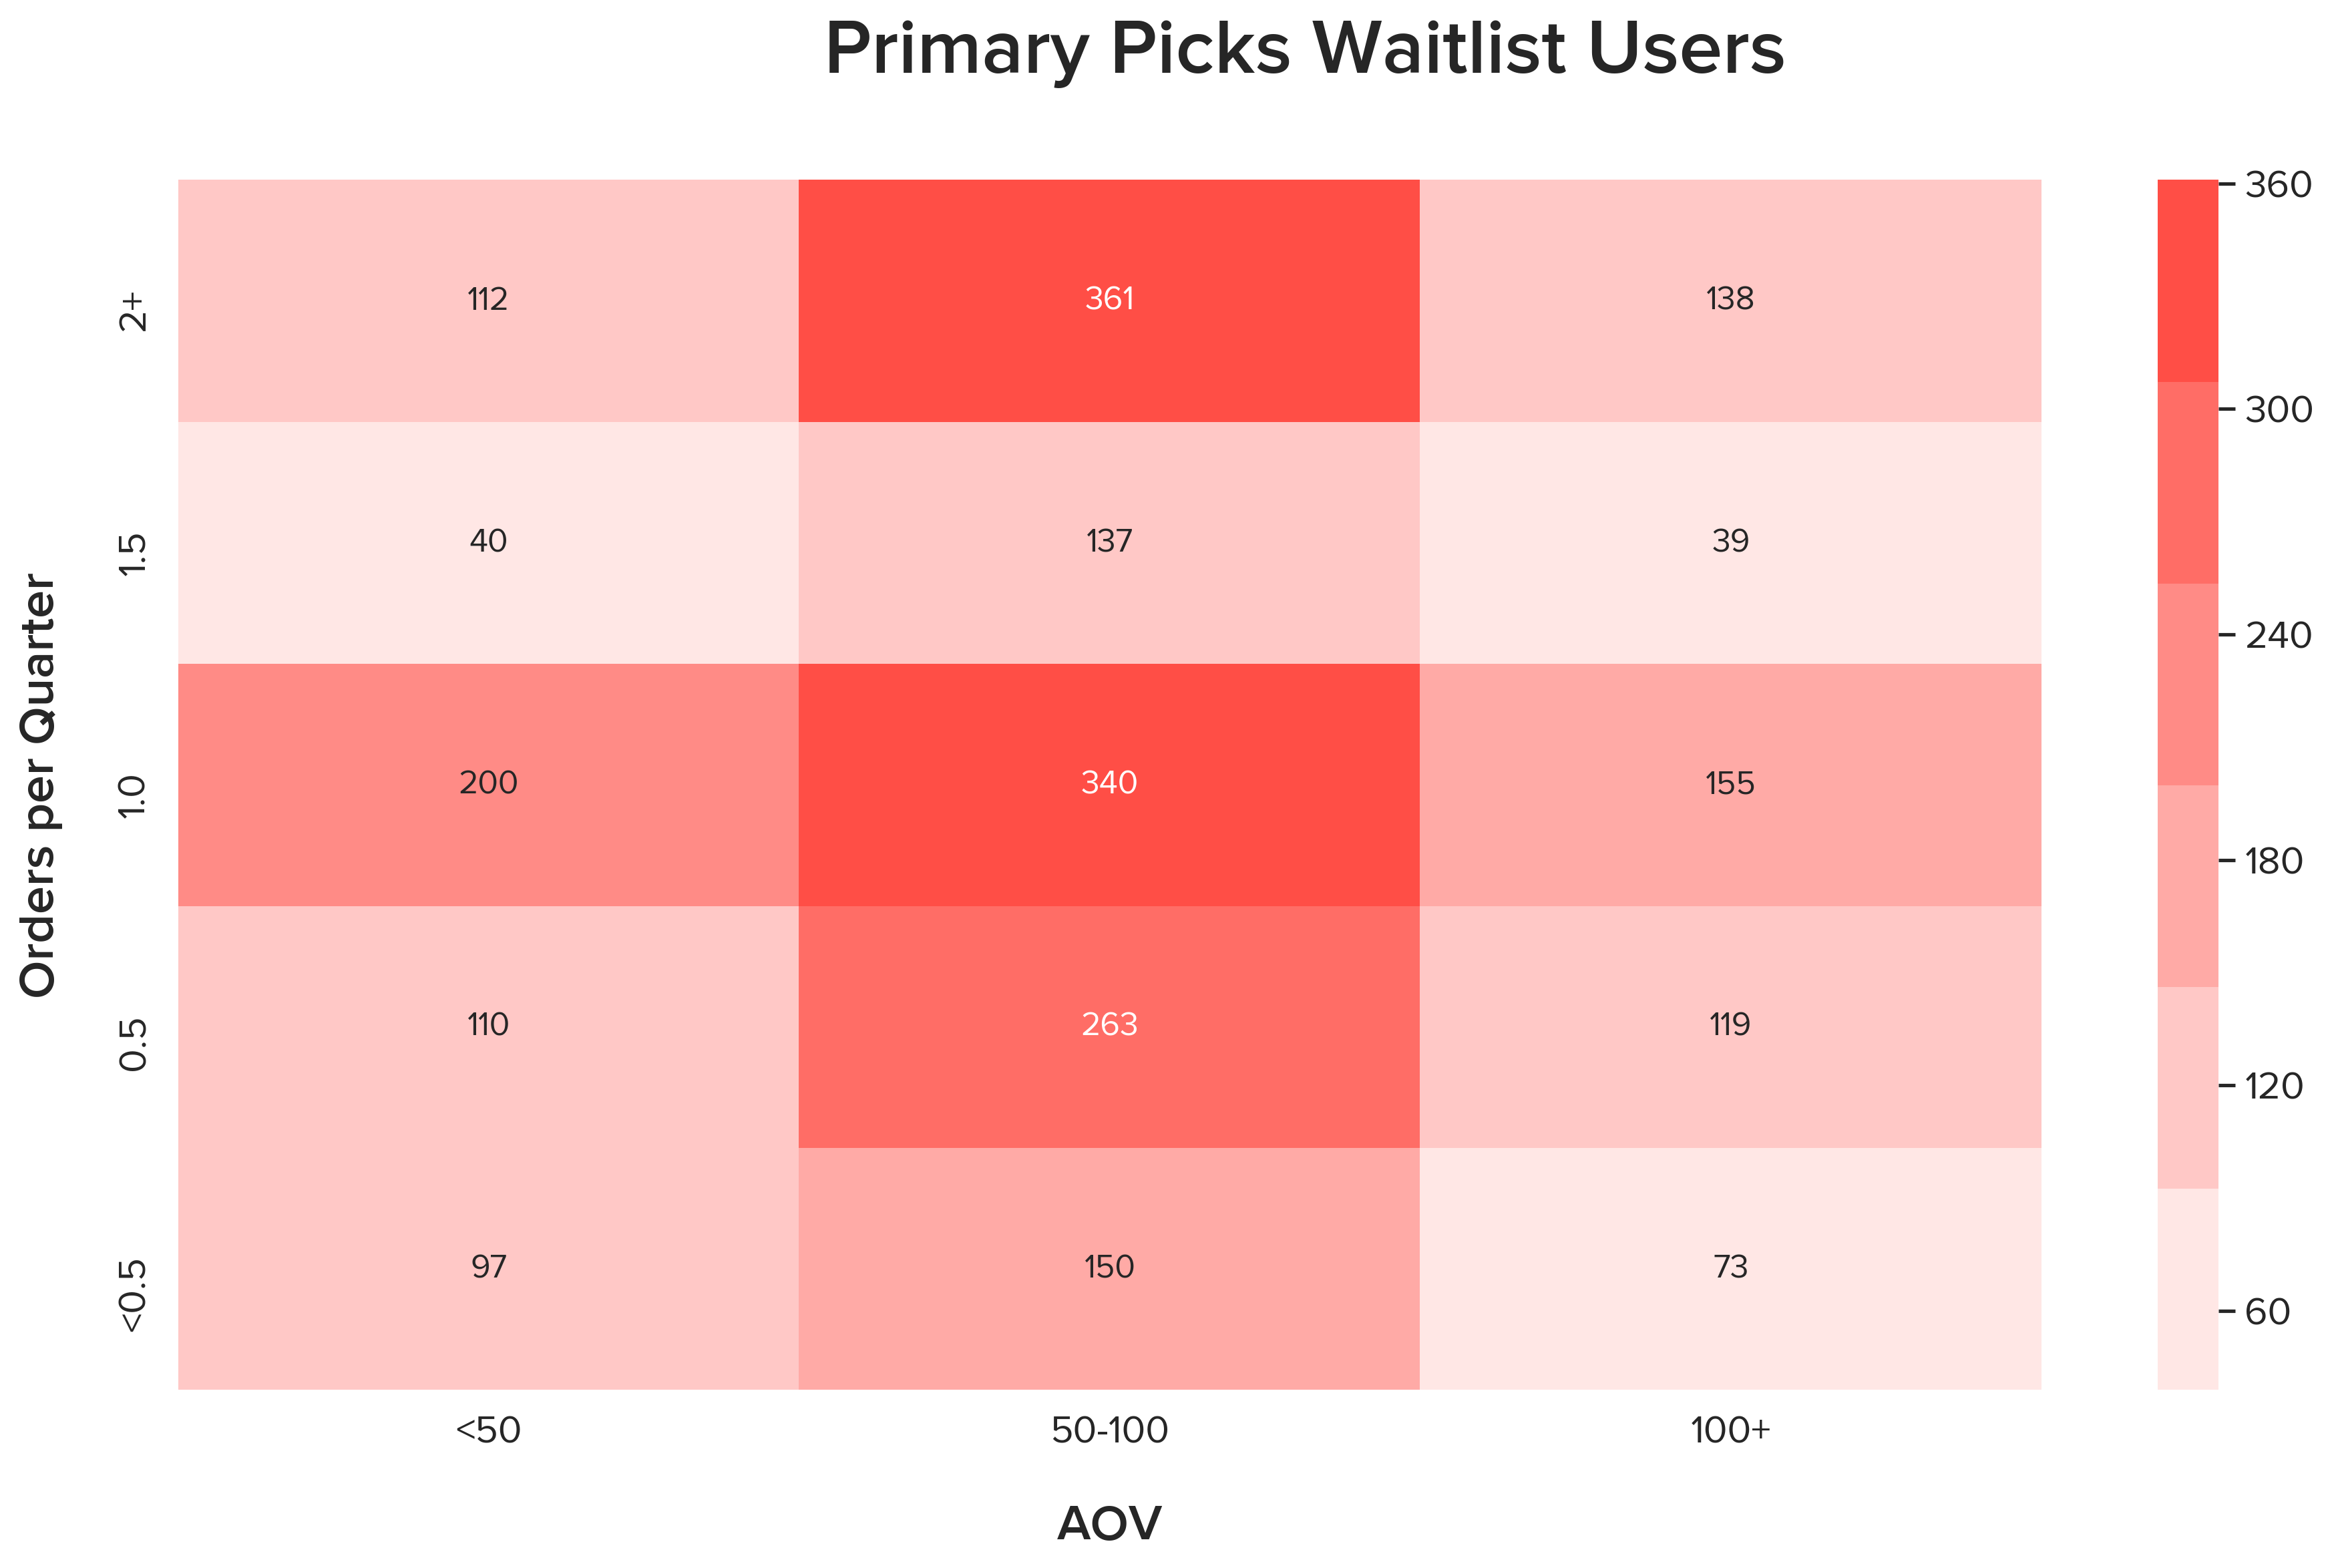

In [9]:
picks_waitlist_user_heatmap(users)

In [13]:
users.groupby("first_order_division").size()

first_order_division
                 62
baby         159998
baby|kids     56187
kids         271135
dtype: int64

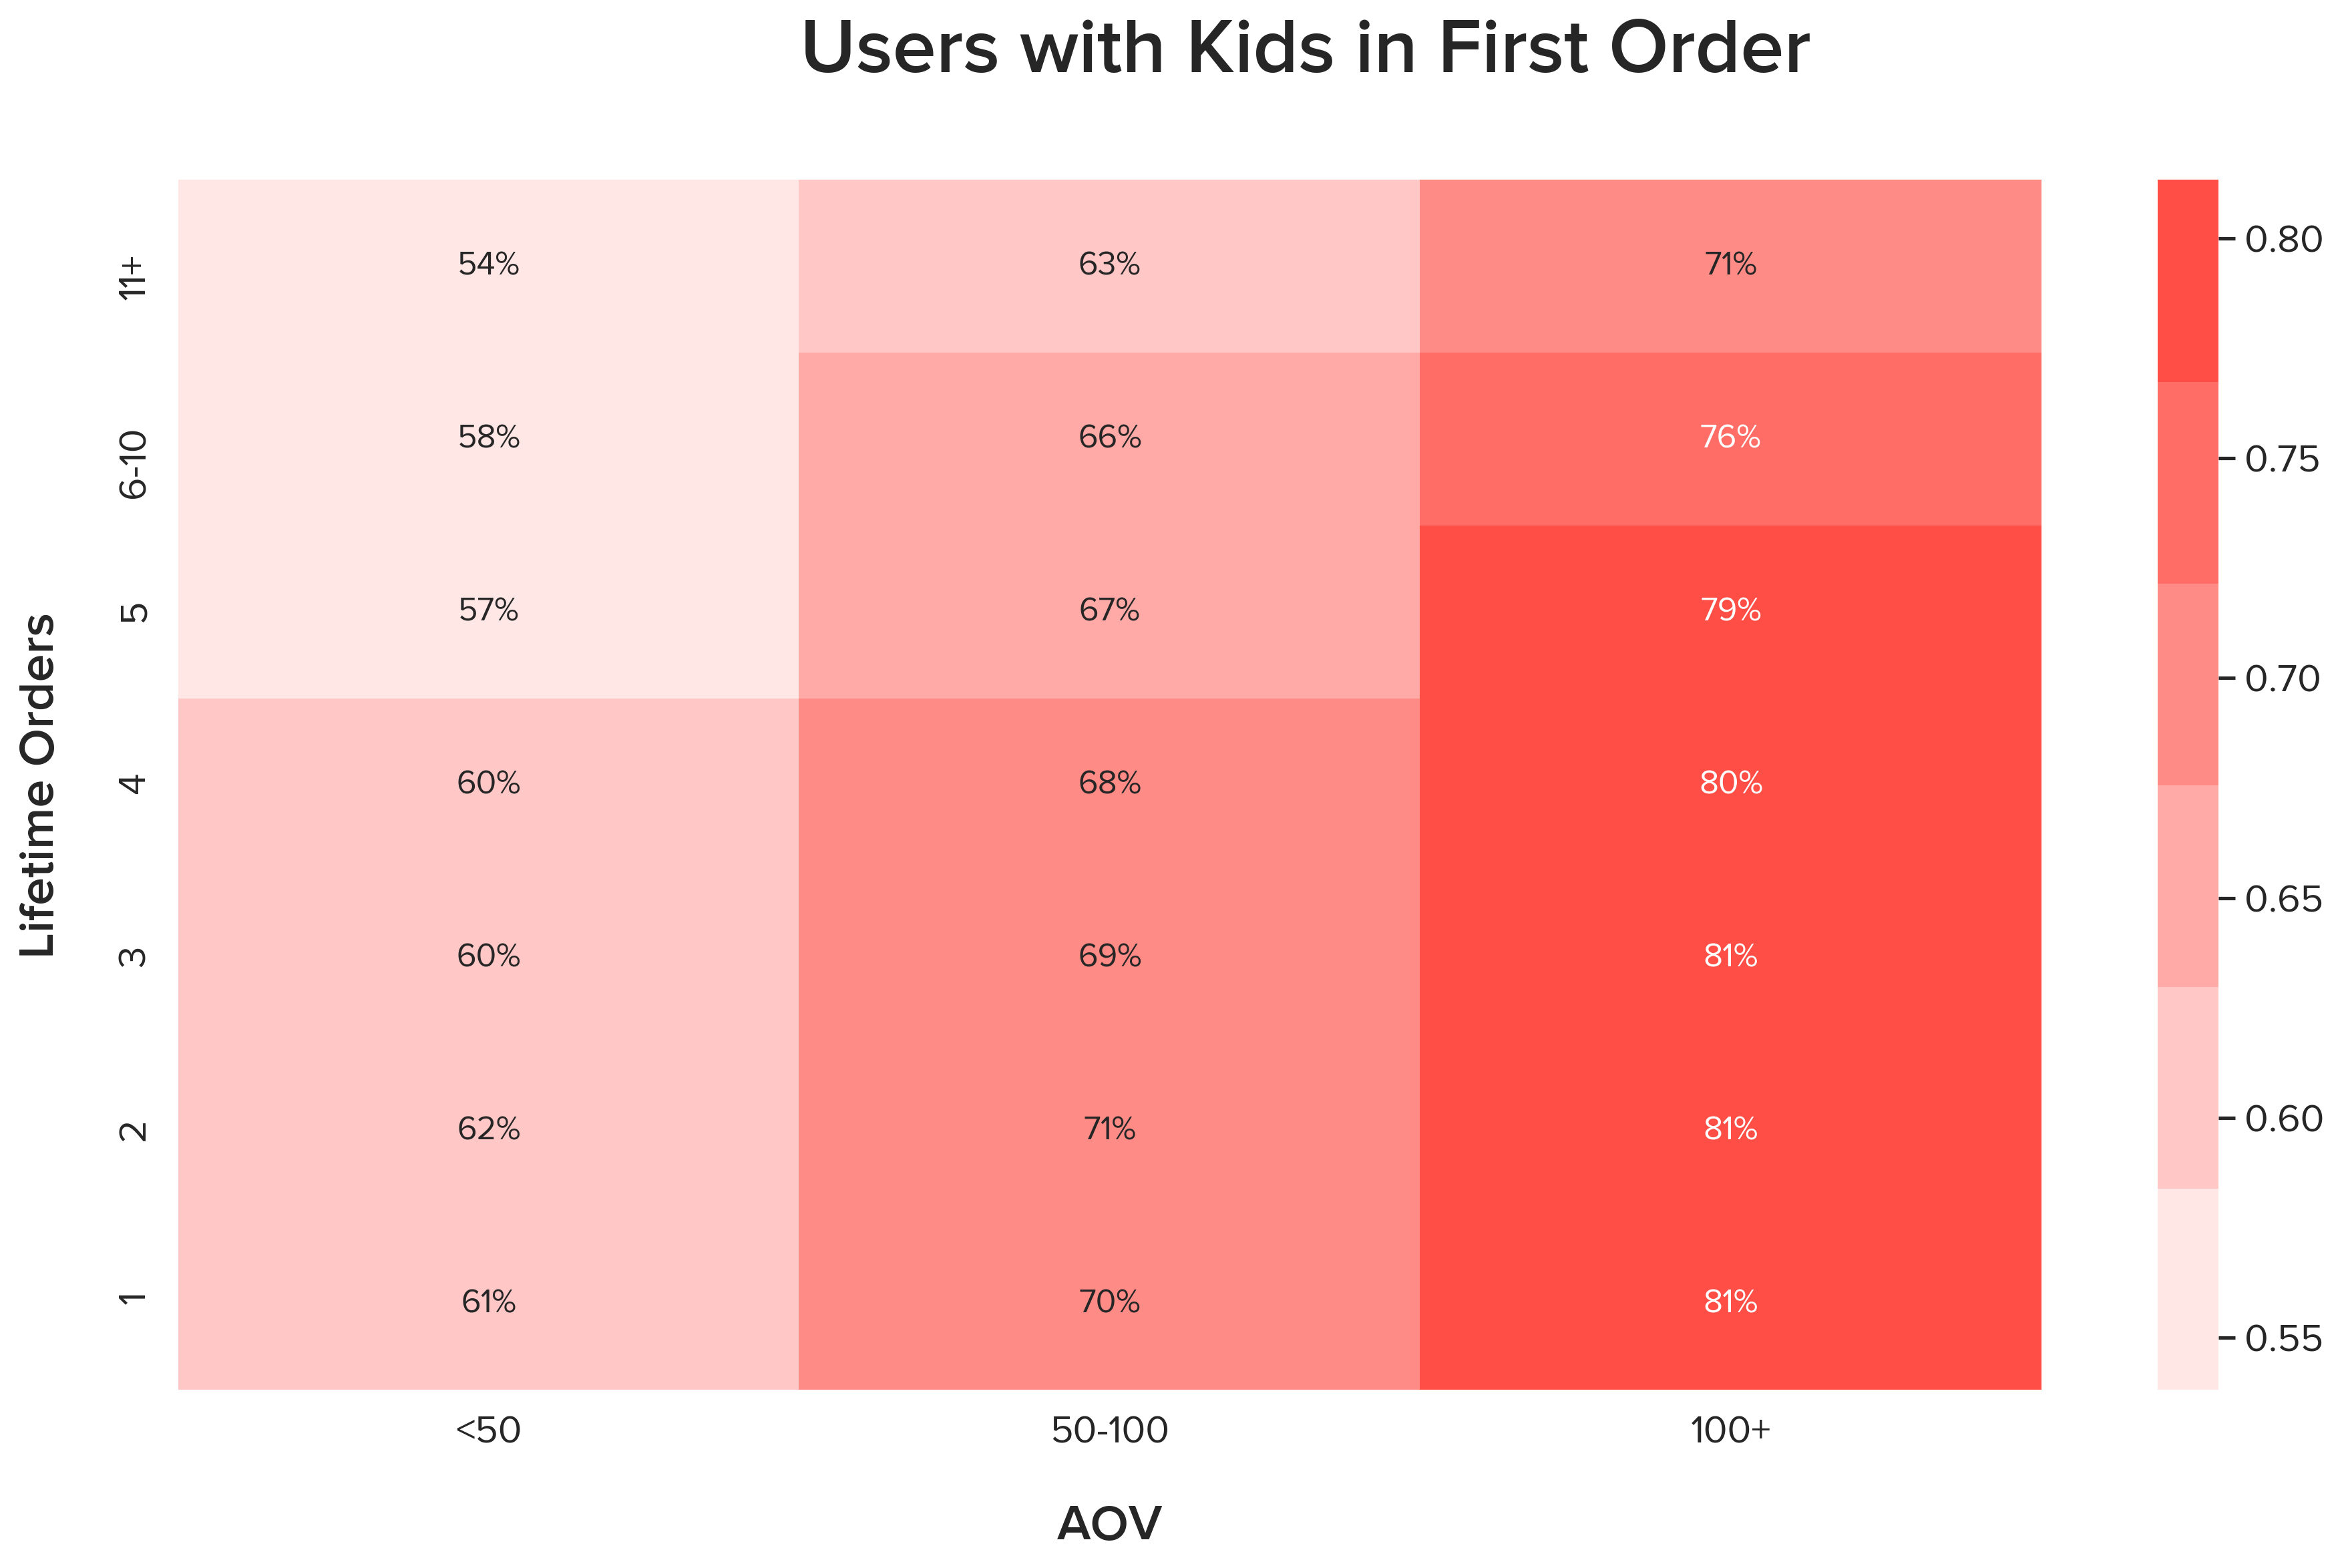

lifetime_aov_bucket,<50,50-100,100+
lifetime_orders_bucket,,,
1,0.6131,0.7030,0.8098
2,0.6155,0.7067,0.8127
3,0.6031,0.6920,0.8133
4,0.6005,0.6789,0.8026
5,0.5679,0.6704,0.7867
6-10,0.5765,0.6610,0.7623
11+,0.5382,0.6266,0.7088


In [16]:
kids_rate_heatmap(users)

In [14]:
users.groupby([UserColumns.LIFETIME_ORDERS_BUCKET, UserColumns.LIFETIME_AOV_BUCKET]).mean()[["first_order_has_kids"]].unstack()

first_order_has_kids              
lifetime_aov_bucket                     <50 50-100   100+
lifetime_orders_bucket                                   
1                                    0.6131 0.7030 0.8098
2                                    0.6155 0.7067 0.8127
3                                    0.6031 0.6920 0.8133
4                                    0.6005 0.6789 0.8026
5                                    0.5679 0.6704 0.7867
6-10                                 0.5765 0.6610 0.7623
11+                                  0.5382 0.6266 0.7088